## EJERCICIO EUROPA WEBSCRAPING

In [47]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [48]:
# Petición http para leer el código HTML de una página web
url = "https://es.wikipedia.org/wiki/Europa"
respuesta = requests.get(url)
if respuesta.status_code == 200:
    print('Ok')
else:
    print( 'No ok')

Ok


In [49]:
# Visualización del código HTML
codigoHTML = respuesta.text
codigoHTML

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Europa - Wikipedia, la enciclopedia libre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-conten

In [50]:
# Ver la lista de tablas contenidas en la página web
lista_df = pd.read_html(codigoHTML, header=0)
len(lista_df)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13684\2240213836.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  lista_df = pd.read_html(codigoHTML, header=0)


11

In [51]:
# Queda una lista con datos de países europeos. Se muestran las 5 primeras líneas y las etiquetas de sus columnas.
europa=lista_df[1]
europa.head(5)

,Bandera,Nombre/Nombre oficial,Establecido,Superficie (km²),Población,Habitantes por km²,Capital,Idioma(s) oficial(es)
0,NaN,Albania República de Albania,1912,28 748,2 832 439,103,Tirana,sq
1,NaN,Alemania República Federal de Alemania,1871,357 022,83 294 633,239,Berlín,de
2,NaN,Andorra Coprincipado de Andorra,1278,468,80 088,170,Andorra la Vieja,ca
3,NaN,Armenia[23]​ República de Armenia,1991,29 749,2 777 970,98,Ereván,hy
4,NaN,Austria República de Austria,1918,83 871,8 958 960,109,Viena,de


In [52]:
europa.tail()

,Bandera,Nombre/Nombre oficial,Establecido,Superficie (km²),Población,Habitantes por km²,Capital,Idioma(s) oficial(es)
45,NaN,Suiza Confederación Suiza,1815,41 277,8 179 294,1981,Berna,de/fr/it/rm
46,NaN,Turquía República de Turquía,1923,783 562,84 614 362,110,Ankara,tr
47,NaN,Ucrania,1991,603 550,36 744 634,630,Kiev,uk
48,NaN,Vaticano Estado de la Ciudad del Vaticano,1929,044,1000,22727,Ciudad del Vaticano,la/it
49,NaN,NaN,Total,10 530 751,743 704 000,700,NaN,NaN


In [53]:
# Ver las columnas
europa.columns

Index(['Bandera', 'Nombre/Nombre oficial', 'Establecido', 'Superficie (km²)',
       'Población', 'Habitantes  por km²', 'Capital', 'Idioma(s) oficial(es)'],
      dtype='object')

In [54]:
europa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bandera                0 non-null      float64
 1   Nombre/Nombre oficial  49 non-null     object 
 2   Establecido            50 non-null     object 
 3   Superficie (km²)       50 non-null     object 
 4   Población              50 non-null     object 
 5   Habitantes  por km²    50 non-null     object 
 6   Capital                49 non-null     object 
 7   Idioma(s) oficial(es)  49 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.3+ KB


In [55]:
# Limpiar los espacios extras en el nombre de la columna
europa.columns = europa.columns.str.replace(r'\s{2,}', ' ', regex=True)

In [56]:
europa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bandera                0 non-null      float64
 1   Nombre/Nombre oficial  49 non-null     object 
 2   Establecido            50 non-null     object 
 3   Superficie (km²)       50 non-null     object 
 4   Población              50 non-null     object 
 5   Habitantes por km²     50 non-null     object 
 6   Capital                49 non-null     object 
 7   Idioma(s) oficial(es)  49 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.3+ KB


In [57]:
# Corregir columnas y filas con caractéres especiales
europa['Superficie (km²)'] = europa['Superficie (km²)'].str.replace(chr(160), '')
europa['Población'] = europa['Población'].str.replace(chr(160),'')
europa['Habitantes por km²'] = europa['Habitantes por km²'].str.replace(chr(160),'')
europa = europa.drop([32, 35, 37])
europa.head(10)

,Bandera,Nombre/Nombre oficial,Establecido,Superficie (km²),Población,Habitantes por km²,Capital,Idioma(s) oficial(es)
0,NaN,Albania República de Albania,1912,28748,2832439,103,Tirana,sq
1,NaN,Alemania República Federal de Alemania,1871,357022,83294633,239,Berlín,de
2,NaN,Andorra Coprincipado de Andorra,1278,468,80088,170,Andorra la Vieja,ca
3,NaN,Armenia[23]​ República de Armenia,1991,29749,2777970,98,Ereván,hy
4,NaN,Austria República de Austria,1918,83871,8958960,109,Viena,de
5,NaN,Azerbaiyán República de Azerbaiyán,1991,86600,10412651,126,Bakú,az
6,NaN,Bélgica Reino de Bélgica,1830,30528,11686140,386,Bruselas,nl/fr/de
7,NaN,Bielorrusia República de Bielorrusia,1991,207600,9498238,470,Minsk,ru/be
8,NaN,Bosnia y Herzegovina,1992,51917,3211000,620,Sarajevo,bs/hr/sr
9,NaN,Bulgaria República de Bulgaria,1908,110879,6385500,620,Sofía,bg


In [58]:
europa.tail()

,Bandera,Nombre/Nombre oficial,Establecido,Superficie (km²),Población,Habitantes por km²,Capital,Idioma(s) oficial(es)
45,NaN,Suiza Confederación Suiza,1815,41277,8179294,1981,Berna,de/fr/it/rm
46,NaN,Turquía República de Turquía,1923,783562,84614362,110,Ankara,tr
47,NaN,Ucrania,1991,603550,36744634,630,Kiev,uk
48,NaN,Vaticano Estado de la Ciudad del Vaticano,1929,044,1000,22727,Ciudad del Vaticano,la/it
49,NaN,NaN,Total,10530751,743704000,700,NaN,NaN


In [59]:
europa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bandera                0 non-null      float64
 1   Nombre/Nombre oficial  46 non-null     object 
 2   Establecido            47 non-null     object 
 3   Superficie (km²)       47 non-null     object 
 4   Población              47 non-null     object 
 5   Habitantes por km²     47 non-null     object 
 6   Capital                46 non-null     object 
 7   Idioma(s) oficial(es)  46 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.3+ KB


In [60]:
# Convertir a tipo numérico las datos almacenados en las columnas 'Superficie(km²)', 'Población', y 'Habitantes por km²'
europa['Superficie (km²)'] = pd.to_numeric(europa['Superficie (km²)'])
europa['Población'] = pd.to_numeric(europa['Población'])
europa['Habitantes por km²'] = pd.to_numeric(europa['Habitantes por km²'])


In [61]:
europa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bandera                0 non-null      float64
 1   Nombre/Nombre oficial  46 non-null     object 
 2   Establecido            47 non-null     object 
 3   Superficie (km²)       47 non-null     int64  
 4   Población              47 non-null     int64  
 5   Habitantes por km²     47 non-null     int64  
 6   Capital                46 non-null     object 
 7   Idioma(s) oficial(es)  46 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.3+ KB


In [66]:
# Filtrar las columnas numéricas int del DataFrame
europa_numeric = europa.select_dtypes(include=[int])

In [67]:
# Calcular la correlación solo para las columnas numéricas
europa_numeric.corr()

,Superficie (km²),Población,Habitantes por km²
Superficie (km²),1.000000,0.647575,-0.076184
Población,0.647575,1.000000,-0.064369
Habitantes por km²,-0.076184,-0.064369,1.000000


In [68]:
# Calcular la covarianza solo para las columnas numéricas
europa_numeric.cov()

,Superficie (km²),Población,Habitantes por km²
Superficie (km²),8.274876e+12,2.047085e+14,-8.264900e+08
Población,2.047085e+14,1.207621e+16,-2.667681e+10
Habitantes por km²,-8.264900e+08,-2.667681e+10,1.422290e+07


Text(510.3244949494949, 0.5, 'Población')

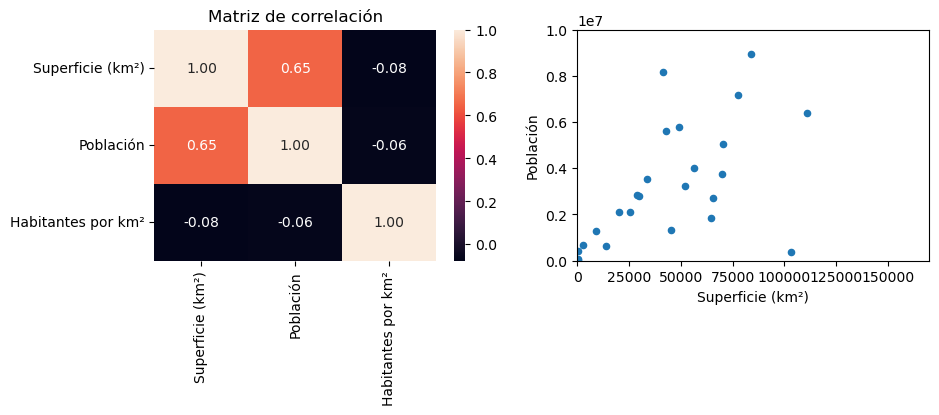

In [69]:
# Ver la tabla de correlación con mapa de color
import matplotlib.pyplot as plt
import seaborn as sns

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.heatmap(europa_numeric.corr(), ax=ax1, vmax=1, square=False, annot=True, fmt='.2f')
ax1.set_title('Matriz de correlación')
europa_numeric.plot(ax=ax2, kind='scatter', x='Superficie (km²)', y='Población')
plt.xlim([0, 170000])
plt.ylim([0, 10000000])
plt.xlabel('Superficie (km²)')
plt.ylabel('Población')